# scikit-learn中的PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection._split import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
X_train.shape

(1347, 64)

## 不降维，直接使用kNN分类看看效果

In [4]:
%%time

from sklearn.neighbors.classification import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
# 手写数字，每个样本的特征应该是每个像素的RGB，度量是一样的，无需归一化
knn_clf.fit(X_train, y_train)

CPU times: user 23.4 ms, sys: 10.8 ms, total: 34.2 ms
Wall time: 42.1 ms


In [5]:
knn_clf.score(X_test, y_test)

0.98666666666666669

## 试试PCA后，kNN的效果

### 直接降到二维

In [6]:
from sklearn.decomposition.pca import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
# 测试数据集也需要降维
X_test_reduction = pca.transform(X_test)

In [8]:
%%time

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 1.96 ms, sys: 635 µs, total: 2.59 ms
Wall time: 2.02 ms


In [9]:
knn_clf.score(X_test_reduction, y_test)

0.60666666666666669

时间节省很多，但精度大幅下降  
### 应该选择降到什么维度，以保持时间和精度的平衡呢？

In [10]:
pca = PCA(n_components=np.shape(X_train)[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([  1.45668166e-01,   1.37354688e-01,   1.17777287e-01,
         8.49968861e-02,   5.86018996e-02,   5.11542945e-02,
         4.26605279e-02,   3.60119663e-02,   3.41105814e-02,
         3.05407804e-02,   2.42337671e-02,   2.28700570e-02,
         1.80304649e-02,   1.79346003e-02,   1.45798298e-02,
         1.42044841e-02,   1.29961033e-02,   1.26617002e-02,
         1.01728635e-02,   9.09314698e-03,   8.85220461e-03,
         7.73828332e-03,   7.60516219e-03,   7.11864860e-03,
         6.85977267e-03,   5.76411920e-03,   5.71688020e-03,
         5.08255707e-03,   4.89020776e-03,   4.34888085e-03,
         3.72917505e-03,   3.57755036e-03,   3.26989470e-03,
         3.14917937e-03,   3.09269839e-03,   2.87619649e-03,
         2.50362666e-03,   2.25417403e-03,   2.20030857e-03,
         1.98028746e-03,   1.88195578e-03,   1.52769283e-03,
         1.42823692e-03,   1.38003340e-03,   1.17572392e-03,
         1.07377463e-03,   9.55152460e-04,   9.00017642e-04,
         5.79162563e-04,

##### 画个折线图看看保留的维数与精度之间的关系

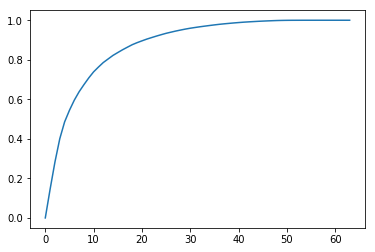

In [14]:
plt.plot([i for i in range(X_train.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i]) for i in range(X_train.shape[1])])
plt.show()

##### scikit-learn中初始化PCA时,n_components，如果是1个小于1的数，表示需要解释多少的数据（一个小于等于1的百分比数）

In [15]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.n_components

0.95

In [17]:
pca.n_components_

28

In [18]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [19]:
%%time

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 3.12 ms, sys: 647 µs, total: 3.77 ms
Wall time: 3.13 ms


In [20]:
knn_clf.score(X_test_reduction, y_test)

0.97999999999999998